In [1]:
from sklearn import linear_model,ensemble, tree, model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

%matplotlib inline

from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
van = 'VAN'
sea = 'SEA'
mem = 'MEM'
okc = 'OKC'
nj = 'NJ'
bkn = 'BKN'

-----------------------------------------------------------------------------------------------------------

Scraping and Cleaning Shooting statistic data

In [3]:
# Scraping team shooting statistic data from foxsports.com from the past 25 seasons

def shooting_download(year):
    url= 'http://www.foxsports.com/nba/team-stats?season=' + year +'&category=SHOOTING&group=1&sort=6&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0'
    print(url)
    response = requests.get(url)
    page = response.text
    return page
        
years = ['2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
        '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995']
shooting_soups = {}

for year in years:
    soup = BeautifulSoup(shooting_download(year), 'lxml')
    shooting_soups[year] = soup

print (len(shooting_soups))

http://www.foxsports.com/nba/team-stats?season=2016&category=SHOOTING&group=1&sort=6&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2015&category=SHOOTING&group=1&sort=6&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2014&category=SHOOTING&group=1&sort=6&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2013&category=SHOOTING&group=1&sort=6&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2012&category=SHOOTING&group=1&sort=6&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2011&category=SHOOTING&group=1&sort=6&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2010&category=SHOOTING&group=1&sort=6&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2009&category=SHOOTING&group=1&sort=6&time=

In [4]:
# Looking through each soup object for each season's shooting stats to put them in a dictionary

shooting_stats = {}

for year, soup in shooting_soups.items():
    tables = soup.find_all('table')

    for table in tables:
        rows = [row for row in table.find_all('tr')]
        first = rows[0]
        rows = rows[1:31]
    
        for row in rows:
            raw_teams = row.find_all('span')
#            print (raw_teams)
            team = str(raw_teams[2].text) + str('_'+year)
        
            cols = row.find_all('td')
            cols = cols[1:21]
#            print (cols)
            shooting_stats[team] = [float(i.text) for i in cols]

#print (final_stats)

In [5]:
# Converting the shooting statistics dictionary to a pandas dataframe

shooting_names = ['GP', 'PPG', 'FGM', 'FGA', 'FGM/G', 'FGA/G', 'FG%', '3FGM', '3FGA', '3FGM/G', '3FGA/G', '3FG%', 'FTM',
        'FTA', 'FTM/G', 'FTA/G', 'FT%', 'PPS', 'TS%', 'EFG%']

sh_stats_df = pd.DataFrame(shooting_stats, index=shooting_names)
sh_stats_df = sh_stats_df.T


In [6]:
# Replacing old team names with the new updated ones to keep consistency

sh_stats_df.index = sh_stats_df.index.str.replace(van, mem)
sh_stats_df.index = sh_stats_df.index.str.replace(sea, okc)
sh_stats_df.index = sh_stats_df.index.str.replace(nj, bkn)

sh_stats_df = sh_stats_df.T
sh_stats_df

,ATL_1995,ATL_1996,ATL_1997,ATL_1998,ATL_1999,ATL_2000,ATL_2001,ATL_2002,ATL_2003,ATL_2004,...,WSH_2007,WSH_2008,WSH_2009,WSH_2010,WSH_2011,WSH_2012,WSH_2013,WSH_2014,WSH_2015,WSH_2016
GP,82.000,82.000,82.000,50.000,82.000,82.000,82.000,82.000,82.000,82.000,...,82.000,82.000,82.000,82.000,66.000,82.000,82.000,82.000,82.000,82.000
PPG,98.300,94.800,95.900,86.300,94.300,91.000,94.000,94.100,92.800,92.700,...,98.800,96.100,96.200,97.300,93.600,93.200,100.700,98.500,104.100,109.200
FGM,2985.000,2812.000,2887.000,1539.000,3000.000,2876.000,2901.000,2859.000,2829.000,2942.000,...,2986.000,2994.000,3008.000,3048.000,2414.000,2910.000,3177.000,3139.000,3238.000,3388.000
FGA,6665.000,6307.000,6352.000,3760.000,6807.000,6668.000,6610.000,6434.000,6529.000,6672.000,...,6695.000,6655.000,6700.000,6888.000,5475.000,6693.000,6920.000,6790.000,7033.000,7137.000
FGM/G,36.400,34.300,35.200,30.800,36.600,35.100,35.400,34.900,34.500,35.900,...,36.400,36.500,36.700,37.200,36.600,35.500,38.700,38.300,39.500,41.300
FGA/G,81.300,76.900,77.500,75.200,83.000,81.300,80.600,78.500,79.600,81.400,...,81.600,81.200,81.700,84.000,83.000,81.600,84.400,82.800,85.800,87.000
FG%,0.448,0.446,0.455,0.409,0.441,0.431,0.439,0.444,0.433,0.441,...,0.446,0.450,0.449,0.443,0.441,0.435,0.459,0.462,0.460,0.475
3FGM,566.000,659.000,337.000,197.000,258.000,333.000,423.000,402.000,419.000,304.000,...,575.000,395.000,432.000,392.000,344.000,545.000,647.000,497.000,709.000,756.000
3FGA,1595.000,1834.000,1016.000,644.000,814.000,933.000,1194.000,1141.000,1249.000,973.000,...,1614.000,1198.000,1225.000,1182.000,1075.000,1495.000,1704.000,1381.000,1983.000,2030.000
3FGM/G,6.900,8.000,4.100,3.900,3.100,4.100,5.200,4.900,5.100,3.700,...,7.000,4.800,5.300,4.800,5.200,6.600,7.900,6.100,8.600,9.200


-----

Scraping and Cleaning Defensive stats data

In [7]:
# Scraping team defense statistic data from foxsports.com from the past 20 seasons

def defense_download(year):
    url= 'http://www.foxsports.com/nba/team-stats?season=' + year +'&category=DEFENSE&group=1&time=0'
    print(url)
    response = requests.get(url)
    page = response.text
    return page
        
years = ['2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
        '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995']
defense_soups = {}

for year in years:
    soup = BeautifulSoup(defense_download(year), 'lxml')
    defense_soups[year] = soup

print (len(defense_soups))

http://www.foxsports.com/nba/team-stats?season=2016&category=DEFENSE&group=1&time=0
http://www.foxsports.com/nba/team-stats?season=2015&category=DEFENSE&group=1&time=0
http://www.foxsports.com/nba/team-stats?season=2014&category=DEFENSE&group=1&time=0
http://www.foxsports.com/nba/team-stats?season=2013&category=DEFENSE&group=1&time=0
http://www.foxsports.com/nba/team-stats?season=2012&category=DEFENSE&group=1&time=0
http://www.foxsports.com/nba/team-stats?season=2011&category=DEFENSE&group=1&time=0
http://www.foxsports.com/nba/team-stats?season=2010&category=DEFENSE&group=1&time=0
http://www.foxsports.com/nba/team-stats?season=2009&category=DEFENSE&group=1&time=0
http://www.foxsports.com/nba/team-stats?season=2008&category=DEFENSE&group=1&time=0
http://www.foxsports.com/nba/team-stats?season=2007&category=DEFENSE&group=1&time=0
http://www.foxsports.com/nba/team-stats?season=2006&category=DEFENSE&group=1&time=0
http://www.foxsports.com/nba/team-stats?season=2005&category=DEFENSE&group=1

In [8]:
# Looking through each soup object for each season's defense stats to put them in a dictionary

defense_stats = {}

for year, soup in defense_soups.items():
    tables = soup.find_all('table')

    for table in tables:
        rows = [row for row in table.find_all('tr')]
        first = rows[0]
        rows = rows[1:31]
    
        for row in rows:
            raw_teams = row.find_all('span')
#            print (raw_teams)
            team = str(raw_teams[2].text) + str('_'+year)
        
            cols = row.find_all('td')
            cols = cols[2:12]
#            print (cols)
            defense_stats[team] = [float(i.text) for i in cols]

#print (defense_stats)

In [9]:
# Converting the defense statistics dictionary to a pandas dataframe

defense_names = ['PPG ALLOW', 'FG% ALLOW', '3FG% ALLOW', 'EFG% ALLOW', 'TS% ALLOW', 'STL', 'SPG', 'BLK', 'BPG', 'TPG ALLOW']

def_stats_df = pd.DataFrame(defense_stats, index=defense_names)
def_stats_df = def_stats_df.T


In [10]:
# Replacing old team names with the new updated ones to keep consistency

def_stats_df.index = def_stats_df.index.str.replace(van, mem)
def_stats_df.index = def_stats_df.index.str.replace(sea, okc)
def_stats_df.index = def_stats_df.index.str.replace(nj, bkn)

def_stats_df = def_stats_df.T
def_stats_df

,ATL_1995,ATL_1996,ATL_1997,ATL_1998,ATL_1999,ATL_2000,ATL_2001,ATL_2002,ATL_2003,ATL_2004,...,WSH_2007,WSH_2008,WSH_2009,WSH_2010,WSH_2011,WSH_2012,WSH_2013,WSH_2014,WSH_2015,WSH_2016
PPG ALLOW,97.100,89.400,92.300,83.400,99.700,96.200,98.300,97.600,97.500,102.500,...,99.200,103.500,101.000,104.700,98.400,95.800,99.400,97.800,104.600,107.400
FG% ALLOW,0.474,0.435,0.442,0.413,0.455,0.442,0.459,0.436,0.440,0.476,...,0.461,0.482,0.463,0.471,0.453,0.440,0.458,0.433,0.462,0.466
3FG% ALLOW,0.360,0.347,0.342,0.300,0.367,0.367,0.355,0.359,0.358,0.379,...,0.386,0.387,0.360,0.373,0.350,0.349,0.347,0.349,0.371,0.364
EFG% ALLOW,0.512,0.472,0.468,0.437,0.481,0.472,0.495,0.469,0.476,0.513,...,0.513,0.533,0.502,0.512,0.492,0.483,0.504,0.481,0.515,0.524
TS% ALLOW,0.550,0.510,0.506,0.480,0.521,0.522,0.535,0.514,0.522,0.564,...,0.552,0.571,0.546,0.557,0.536,0.522,0.545,0.521,0.555,0.561
STL,771.000,701.000,653.000,346.000,500.000,634.000,667.000,611.000,627.000,629.000,...,632.000,619.000,493.000,665.000,527.000,598.000,668.000,601.000,708.000,694.000
SPG,9.400,8.500,8.000,6.900,6.100,7.700,8.100,7.500,7.600,7.700,...,7.700,7.500,6.000,8.100,8.000,7.300,8.200,7.300,8.600,8.500
BLK,319.000,427.000,491.000,260.000,461.000,387.000,350.000,473.000,408.000,344.000,...,391.000,365.000,421.000,502.000,417.000,376.000,377.000,378.000,323.000,337.000
BPG,3.900,5.200,6.000,5.200,5.600,4.700,4.300,5.800,5.000,4.200,...,4.800,4.500,5.100,6.100,6.300,4.600,4.600,4.600,3.900,4.100
TPG ALLOW,16.400,14.700,12.900,12.600,11.700,14.100,14.400,12.400,13.200,14.300,...,13.400,13.400,12.800,15.000,14.500,13.900,15.400,13.300,15.600,14.800


----

Scraping and Cleaning Rebounding data

In [11]:
# Scraping team defense statistic data from foxsports.com from the past 20 seasons

def rebounds_download(year):
    url= 'http://www.foxsports.com/nba/team-stats?season=' + year +'&category=REBOUNDING&group=1&sort=8&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0'
    print(url)
    response = requests.get(url)
    page = response.text
    return page
        
years = ['2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
        '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995']
rebounds_soups = {}

for year in years:
    soup = BeautifulSoup(rebounds_download(year), 'lxml')
    rebounds_soups[year] = soup

print (len(rebounds_soups))

http://www.foxsports.com/nba/team-stats?season=2016&category=REBOUNDING&group=1&sort=8&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2015&category=REBOUNDING&group=1&sort=8&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2014&category=REBOUNDING&group=1&sort=8&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2013&category=REBOUNDING&group=1&sort=8&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2012&category=REBOUNDING&group=1&sort=8&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2011&category=REBOUNDING&group=1&sort=8&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2010&category=REBOUNDING&group=1&sort=8&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2009&category=REBOUNDING&grou

In [12]:
# Looking through each soup object for each season's rebounding stats to put them in a dictionary

rebounding_stats = {}

for year, soup in rebounds_soups.items():
    tables = soup.find_all('table')

    for table in tables:
        rows = [row for row in table.find_all('tr')]
        first = rows[0]
        rows = rows[1:31]
    
        for row in rows:
            raw_teams = row.find_all('span')
#            print (raw_teams)
            team = str(raw_teams[2].text) + str('_'+year)
        
            cols = row.find_all('td')
            cols = cols[2:11]
#            print (cols)
            rebounding_stats[team] = [float(i.text) for i in cols]

#print (rebounding_stats)

In [13]:
# Converting the rebounding statistics dictionary to a pandas dataframe

rebounding_names = ['OFF', 'ORPG', 'ORPG ALLOW', 'DEF', 'DRPG', 'DRPG ALLOW', 'REB', 'RPG', 'RGP ALLOW']

reb_stats_df = pd.DataFrame(rebounding_stats, index=rebounding_names)
reb_stats_df = reb_stats_df.T


In [14]:
# Replacing old team names with the new updated ones to keep consistency

reb_stats_df.index = reb_stats_df.index.str.replace(van, mem)
reb_stats_df.index = reb_stats_df.index.str.replace(sea, okc)
reb_stats_df.index = reb_stats_df.index.str.replace(nj, bkn)

reb_stats_df = reb_stats_df.T
reb_stats_df

,ATL_1995,ATL_1996,ATL_1997,ATL_1998,ATL_1999,ATL_2000,ATL_2001,ATL_2002,ATL_2003,ATL_2004,...,WSH_2007,WSH_2008,WSH_2009,WSH_2010,WSH_2011,WSH_2012,WSH_2013,WSH_2014,WSH_2015,WSH_2016
OFF,1182.0,1021.0,1105.0,676.0,1146.0,1028.0,955.0,937.0,996.0,1100.0,...,1007.0,956.0,966.0,1013.0,775.0,887.0,886.0,862.0,743.0,843.0
ORPG,14.4,12.5,13.5,13.5,14.0,12.5,11.6,11.4,12.1,13.4,...,12.3,11.7,11.8,12.4,11.7,10.8,10.8,10.5,9.1,10.3
ORPG ALLOW,12.9,12.7,13.2,11.6,12.8,12.5,12.2,13.1,12.8,11.0,...,11.0,11.4,11.4,12.1,12.3,11.0,10.1,10.0,9.4,10.6
DEF,2148.0,2350.0,2418.0,1499.0,2570.0,2490.0,2445.0,2558.0,2507.0,2335.0,...,2404.0,2330.0,2458.0,2374.0,1975.0,2652.0,2573.0,2801.0,2688.0,2671.0
DRPG,26.2,28.7,29.5,30.0,31.3,30.4,29.8,31.2,30.6,28.5,...,29.3,28.4,30.0,29.0,29.9,32.3,31.4,34.2,32.8,32.6
DRPG ALLOW,28.0,27.1,26.2,27.4,30.2,30.9,30.8,29.5,30.3,30.3,...,30.2,30.4,30.9,31.8,31.2,33.2,32.1,31.7,34.9,32.5
REB,3330.0,3371.0,3523.0,2175.0,3716.0,3518.0,3400.0,3495.0,3503.0,3435.0,...,3411.0,3286.0,3424.0,3387.0,2750.0,3539.0,3459.0,3663.0,3431.0,3514.0
RPG,40.6,41.1,43.0,43.5,45.3,42.9,41.5,42.6,42.7,41.9,...,41.6,40.1,41.8,41.3,41.7,43.2,42.2,44.7,41.8,42.9
RGP ALLOW,40.8,39.9,39.4,39.0,43.0,43.5,43.0,42.6,43.1,41.3,...,41.2,41.8,42.3,43.9,43.5,44.2,42.2,41.7,44.3,43.0


----

Scraping and Cleaning Passing data

In [15]:
# Scraping team passing statistic data from foxsports.com from the past 20 seasons

def assists_download(year):
    url= 'http://www.foxsports.com/nba/team-stats?season=' + year +'&category=ASSISTS&group=1&sort=2&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0'
    print(url)
    response = requests.get(url)
    page = response.text
    return page
        
years = ['2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
        '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995']
assists_soups = {}

for year in years:
    soup = BeautifulSoup(assists_download(year), 'lxml')
    assists_soups[year] = soup

print (len(assists_soups))

http://www.foxsports.com/nba/team-stats?season=2016&category=ASSISTS&group=1&sort=2&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2015&category=ASSISTS&group=1&sort=2&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2014&category=ASSISTS&group=1&sort=2&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2013&category=ASSISTS&group=1&sort=2&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2012&category=ASSISTS&group=1&sort=2&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2011&category=ASSISTS&group=1&sort=2&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2010&category=ASSISTS&group=1&sort=2&time=0&pos=0&team=1&qual=1&sortOrder=0&opp=0
http://www.foxsports.com/nba/team-stats?season=2009&category=ASSISTS&group=1&sort=2&time=0&pos=0&

In [16]:
# Looking through each soup object for each season's passing stats to put them in a dictionary

assists_stats = {}

for year, soup in assists_soups.items():
    tables = soup.find_all('table')

    for table in tables:
        rows = [row for row in table.find_all('tr')]
        first = rows[0]
        rows = rows[1:31]
    
        for row in rows:
            raw_teams = row.find_all('span')
#            print (raw_teams)
            team = str(raw_teams[2].text) + str('_'+year)
        
            cols = row.find_all('td')
            cols = cols[2:8]
#            print (cols)
            assists_stats[team] = [float(i.text) for i in cols]

#print (assists_stats)

In [17]:
# Converting the passing statistics dictionary to a pandas dataframe

assists_names = ['AST', 'APG', 'APG ALLOW', 'TO', 'TPG', 'TPG ALLOW']

as_stats_df = pd.DataFrame(assists_stats, index=assists_names)
as_stats_df = as_stats_df.T


In [18]:
# Replacing old team names with the new updated ones to keep consistency

as_stats_df.index = as_stats_df.index.str.replace(van, mem)
as_stats_df.index = as_stats_df.index.str.replace(sea, okc)
as_stats_df.index = as_stats_df.index.str.replace(nj, bkn)

as_stats_df = as_stats_df.T
as_stats_df

,ATL_1995,ATL_1996,ATL_1997,ATL_1998,ATL_1999,ATL_2000,ATL_2001,ATL_2002,ATL_2003,ATL_2004,...,WSH_2007,WSH_2008,WSH_2009,WSH_2010,WSH_2011,WSH_2012,WSH_2013,WSH_2014,WSH_2015,WSH_2016
AST,1609.0,1557.0,1569.0,782.0,1548.0,1559.0,1656.0,1679.0,1648.0,1614.0,...,1607.0,1641.0,1557.0,1592.0,1262.0,1775.0,1909.0,1969.0,2005.0,1956.0
APG,19.6,19.0,19.1,15.6,18.9,19.0,20.2,20.5,20.1,19.7,...,19.6,20.0,19.0,19.4,19.1,21.6,23.3,24.0,24.5,23.9
APG ALLOW,22.5,20.3,21.4,17.9,23.0,21.2,22.6,21.6,22.0,22.0,...,23.9,24.6,21.6,23.1,21.5,21.5,22.2,19.9,22.5,22.8
TO,1183.0,1178.0,1158.0,706.0,1219.0,1294.0,1203.0,1306.0,1278.0,1255.0,...,1032.0,1108.0,1158.0,1209.0,961.0,1199.0,1204.0,1233.0,1186.0,1162.0
TPG,14.4,14.4,14.1,14.1,14.9,15.8,14.7,15.9,15.6,15.3,...,12.6,13.5,14.1,14.7,14.6,14.6,14.1,14.4,13.9,13.5
TPG ALLOW,16.4,14.7,12.9,12.6,11.7,14.1,14.4,12.4,13.2,14.3,...,13.4,13.4,12.8,15.0,14.5,13.9,15.4,13.3,15.6,14.8


---

Scraping and Cleaning Standings data

In [19]:
# Scraping team standings (wins and losses) data from foxsports.com from the past 20 seasons

def standings_download(year):
    url='http://www.foxsports.com/nba/standings?season=' + year +'&seasonType=1&grouping=1&advanced=0'
    print (url)
    response = requests.get(url)
    page = response.text
    return page

years = ['2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
        '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995']
standings_soups = {}

for year in years:
    soup = BeautifulSoup(standings_download(year), 'lxml')
    standings_soups[year] = soup

print (len(standings_soups))

http://www.foxsports.com/nba/standings?season=2016&seasonType=1&grouping=1&advanced=0
http://www.foxsports.com/nba/standings?season=2015&seasonType=1&grouping=1&advanced=0
http://www.foxsports.com/nba/standings?season=2014&seasonType=1&grouping=1&advanced=0
http://www.foxsports.com/nba/standings?season=2013&seasonType=1&grouping=1&advanced=0
http://www.foxsports.com/nba/standings?season=2012&seasonType=1&grouping=1&advanced=0
http://www.foxsports.com/nba/standings?season=2011&seasonType=1&grouping=1&advanced=0
http://www.foxsports.com/nba/standings?season=2010&seasonType=1&grouping=1&advanced=0
http://www.foxsports.com/nba/standings?season=2009&seasonType=1&grouping=1&advanced=0
http://www.foxsports.com/nba/standings?season=2008&seasonType=1&grouping=1&advanced=0
http://www.foxsports.com/nba/standings?season=2007&seasonType=1&grouping=1&advanced=0
http://www.foxsports.com/nba/standings?season=2006&seasonType=1&grouping=1&advanced=0
http://www.foxsports.com/nba/standings?season=2005&sea

In [20]:
# Looking through each soup object for each season's standings stats to put them in a dictionary 

team_standings = {}

for year, soup in standings_soups.items():
    tables = soup.find_all('table')
    
    for table in tables:
        rows = [row for row in table.find_all('tr')]
        rows1 = rows[1:16]
        rows2 = rows[18:]
    
        for row in rows1:
            raw = row.find_all('span')
            teams = str(raw[1].text + str('_'+year))
        
            cols = row.find_all('td')
            cols = cols[1:3]

            team_standings[teams] = [float(i.text) for i in cols]
            
        for row in rows2:
            raw = row.find_all('span')
            teams = str(raw[1].text) + str('_'+year)
            
            cols = row.find_all('td')
            cols = cols[1:3]
            
            team_standings[teams] = [float(i.text) for i in cols]

print (team_standings)

{'BOS_2016': [53.0, 29.0], 'CLE_2016': [51.0, 31.0], 'TOR_2016': [51.0, 31.0], 'WSH_2016': [49.0, 33.0], 'ATL_2016': [43.0, 39.0], 'MIL_2016': [42.0, 40.0], 'IND_2016': [42.0, 40.0], 'CHI_2016': [41.0, 41.0], 'MIA_2016': [41.0, 41.0], 'DET_2016': [37.0, 45.0], 'CHA_2016': [36.0, 46.0], 'NY_2016': [31.0, 51.0], 'ORL_2016': [29.0, 53.0], 'PHI_2016': [28.0, 54.0], 'BKN_2016': [20.0, 62.0], 'GS_2016': [67.0, 15.0], 'SA_2016': [61.0, 21.0], 'HOU_2016': [55.0, 27.0], 'LAC_2016': [51.0, 31.0], 'UTA_2016': [51.0, 31.0], 'OKC_2016': [47.0, 35.0], 'MEM_2016': [43.0, 39.0], 'POR_2016': [41.0, 41.0], 'DEN_2016': [40.0, 42.0], 'NO_2016': [34.0, 48.0], 'DAL_2016': [33.0, 49.0], 'SAC_2016': [32.0, 50.0], 'MIN_2016': [31.0, 51.0], 'LAL_2016': [26.0, 56.0], 'PHX_2016': [24.0, 58.0], 'CLE_2015': [57.0, 25.0], 'TOR_2015': [56.0, 26.0], 'MIA_2015': [48.0, 34.0], 'ATL_2015': [48.0, 34.0], 'BOS_2015': [48.0, 34.0], 'CHA_2015': [48.0, 34.0], 'IND_2015': [45.0, 37.0], 'DET_2015': [44.0, 38.0], 'CHI_2015': [42

In [21]:
# Converting the standings statistics dictionary to a pandas dataframe

names = ['WINS', 'LOSSES']
stats_standings = pd.DataFrame(team_standings, index=names)
stats_standings = stats_standings.T

In [22]:
# Replacing old team names with the new updated ones to keep consistency

stats_standings.index = stats_standings.index.str.replace(van, mem)
stats_standings.index = stats_standings.index.str.replace(sea, okc)
stats_standings.index = stats_standings.index.str.replace(nj, bkn)

stats_standings = stats_standings.T
stats_standings

,ATL_1995,ATL_1996,ATL_1997,ATL_1998,ATL_1999,ATL_2000,ATL_2001,ATL_2002,ATL_2003,ATL_2004,...,WSH_2007,WSH_2008,WSH_2009,WSH_2010,WSH_2011,WSH_2012,WSH_2013,WSH_2014,WSH_2015,WSH_2016
WINS,46.0,56.0,50.0,31.0,28.0,25.0,33.0,35.0,28.0,13.0,...,43.0,19.0,26.0,23.0,20.0,29.0,44.0,46.0,41.0,49.0
LOSSES,36.0,26.0,32.0,19.0,54.0,57.0,49.0,47.0,54.0,69.0,...,39.0,63.0,56.0,59.0,46.0,53.0,38.0,36.0,41.0,33.0


----


Merging all dataframes into one giant panda

In [23]:
frames = [sh_stats_df, def_stats_df, reb_stats_df, as_stats_df, stats_standings]
final_stat_table = pd.concat(frames)
final_stat_table = final_stat_table.T
final_stat_table

,GP,PPG,FGM,FGA,FGM/G,FGA/G,FG%,3FGM,3FGA,3FGM/G,...,RPG,RGP ALLOW,AST,APG,APG ALLOW,TO,TPG,TPG ALLOW,WINS,LOSSES
ATL_1995,82.0,98.3,2985.0,6665.0,36.4,81.3,0.448,566.0,1595.0,6.9,...,40.6,40.8,1609.0,19.6,22.5,1183.0,14.4,16.4,46.0,36.0
ATL_1996,82.0,94.8,2812.0,6307.0,34.3,76.9,0.446,659.0,1834.0,8.0,...,41.1,39.9,1557.0,19.0,20.3,1178.0,14.4,14.7,56.0,26.0
ATL_1997,82.0,95.9,2887.0,6352.0,35.2,77.5,0.455,337.0,1016.0,4.1,...,43.0,39.4,1569.0,19.1,21.4,1158.0,14.1,12.9,50.0,32.0
ATL_1998,50.0,86.3,1539.0,3760.0,30.8,75.2,0.409,197.0,644.0,3.9,...,43.5,39.0,782.0,15.6,17.9,706.0,14.1,12.6,31.0,19.0
ATL_1999,82.0,94.3,3000.0,6807.0,36.6,83.0,0.441,258.0,814.0,3.1,...,45.3,43.0,1548.0,18.9,23.0,1219.0,14.9,11.7,28.0,54.0
ATL_2000,82.0,91.0,2876.0,6668.0,35.1,81.3,0.431,333.0,933.0,4.1,...,42.9,43.5,1559.0,19.0,21.2,1294.0,15.8,14.1,25.0,57.0
ATL_2001,82.0,94.0,2901.0,6610.0,35.4,80.6,0.439,423.0,1194.0,5.2,...,41.5,43.0,1656.0,20.2,22.6,1203.0,14.7,14.4,33.0,49.0
ATL_2002,82.0,94.1,2859.0,6434.0,34.9,78.5,0.444,402.0,1141.0,4.9,...,42.6,42.6,1679.0,20.5,21.6,1306.0,15.9,12.4,35.0,47.0
ATL_2003,82.0,92.8,2829.0,6529.0,34.5,79.6,0.433,419.0,1249.0,5.1,...,42.7,43.1,1648.0,20.1,22.0,1278.0,15.6,13.2,28.0,54.0
ATL_2004,82.0,92.7,2942.0,6672.0,35.9,81.4,0.441,304.0,973.0,3.7,...,41.9,41.3,1614.0,19.7,22.0,1255.0,15.3,14.3,13.0,69.0


In [24]:
final_stat_table.isnull().sum()

GP            0
PPG           0
FGM           0
FGA           0
FGM/G         0
FGA/G         0
FG%           0
3FGM          0
3FGA          0
3FGM/G        0
3FGA/G        0
3FG%          0
FTM           0
FTA           0
FTM/G         0
FTA/G         0
FT%           0
PPS           0
TS%           0
EFG%          0
PPG ALLOW     0
FG% ALLOW     0
3FG% ALLOW    0
EFG% ALLOW    0
TS% ALLOW     0
STL           0
SPG           0
BLK           0
BPG           0
TPG ALLOW     0
OFF           0
ORPG          0
ORPG ALLOW    0
DEF           0
DRPG          0
DRPG ALLOW    0
REB           0
RPG           0
RGP ALLOW     0
AST           0
APG           0
APG ALLOW     0
TO            0
TPG           0
TPG ALLOW     0
WINS          0
LOSSES        0
dtype: int64

In [25]:
ye = []
for i in final_stat_table.index:
    t, y = i.split('_')
    ye.append(int(y))
#    print (y)
final_stat_table['SEASON'] = ye

In [26]:
final_stat_table

,GP,PPG,FGM,FGA,FGM/G,FGA/G,FG%,3FGM,3FGA,3FGM/G,...,RGP ALLOW,AST,APG,APG ALLOW,TO,TPG,TPG ALLOW,WINS,LOSSES,SEASON
ATL_1995,82.0,98.3,2985.0,6665.0,36.4,81.3,0.448,566.0,1595.0,6.9,...,40.8,1609.0,19.6,22.5,1183.0,14.4,16.4,46.0,36.0,1995
ATL_1996,82.0,94.8,2812.0,6307.0,34.3,76.9,0.446,659.0,1834.0,8.0,...,39.9,1557.0,19.0,20.3,1178.0,14.4,14.7,56.0,26.0,1996
ATL_1997,82.0,95.9,2887.0,6352.0,35.2,77.5,0.455,337.0,1016.0,4.1,...,39.4,1569.0,19.1,21.4,1158.0,14.1,12.9,50.0,32.0,1997
ATL_1998,50.0,86.3,1539.0,3760.0,30.8,75.2,0.409,197.0,644.0,3.9,...,39.0,782.0,15.6,17.9,706.0,14.1,12.6,31.0,19.0,1998
ATL_1999,82.0,94.3,3000.0,6807.0,36.6,83.0,0.441,258.0,814.0,3.1,...,43.0,1548.0,18.9,23.0,1219.0,14.9,11.7,28.0,54.0,1999
ATL_2000,82.0,91.0,2876.0,6668.0,35.1,81.3,0.431,333.0,933.0,4.1,...,43.5,1559.0,19.0,21.2,1294.0,15.8,14.1,25.0,57.0,2000
ATL_2001,82.0,94.0,2901.0,6610.0,35.4,80.6,0.439,423.0,1194.0,5.2,...,43.0,1656.0,20.2,22.6,1203.0,14.7,14.4,33.0,49.0,2001
ATL_2002,82.0,94.1,2859.0,6434.0,34.9,78.5,0.444,402.0,1141.0,4.9,...,42.6,1679.0,20.5,21.6,1306.0,15.9,12.4,35.0,47.0,2002
ATL_2003,82.0,92.8,2829.0,6529.0,34.5,79.6,0.433,419.0,1249.0,5.1,...,43.1,1648.0,20.1,22.0,1278.0,15.6,13.2,28.0,54.0,2003
ATL_2004,82.0,92.7,2942.0,6672.0,35.9,81.4,0.441,304.0,973.0,3.7,...,41.3,1614.0,19.7,22.0,1255.0,15.3,14.3,13.0,69.0,2004


----

Exploratory Data Analysis and Modeling

In [ ]:
final_stat_table.fillna(0, axis=1, inplace=True)

In [27]:
final_stat_table.describe()

,GP,PPG,FGM,FGA,FGM/G,FGA/G,FG%,3FGM,3FGA,3FGM/G,...,RGP ALLOW,AST,APG,APG ALLOW,TO,TPG,TPG ALLOW,WINS,LOSSES,SEASON
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,...,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,79.834101,98.047926,2930.797235,6487.445469,36.662673,81.210599,0.451531,500.122888,1405.738863,6.235023,...,42.080184,1732.866359,21.682796,21.682181,1134.591398,14.105069,14.105684,39.917051,39.917051,2005.589862
std,7.266793,5.113888,327.434393,667.998094,1.885443,3.186596,0.016412,165.418993,435.530085,1.922987,...,2.106705,228.465144,1.890449,1.791249,140.054381,1.218532,1.253456,13.026454,13.027516,6.339072
min,50.000000,81.900000,1539.000000,3561.000000,30.800000,71.200000,0.401000,98.000000,371.000000,2.000000,...,36.300000,782.000000,15.600000,16.300000,609.000000,10.700000,10.800000,7.000000,9.000000,1995.000000
25%,82.000000,94.700000,2880.500000,6417.000000,35.400000,78.900000,0.441000,380.000000,1096.000000,4.800000,...,40.700000,1645.000000,20.400000,20.400000,1080.000000,13.300000,13.200000,30.000000,30.000000,2000.000000
50%,82.000000,97.700000,2993.000000,6640.000000,36.600000,81.300000,0.451000,491.000000,1382.000000,6.100000,...,42.000000,1752.000000,21.600000,21.700000,1146.000000,14.100000,14.100000,41.000000,40.000000,2006.000000
75%,82.000000,101.350000,3107.000000,6823.500000,37.900000,83.400000,0.462000,599.000000,1642.500000,7.400000,...,43.500000,1862.000000,22.800000,23.000000,1223.500000,14.900000,14.900000,50.000000,49.000000,2011.000000
max,82.000000,115.900000,3532.000000,7431.000000,43.100000,90.600000,0.504000,1181.000000,3306.000000,14.400000,...,49.000000,2491.000000,30.400000,27.100000,1472.000000,18.000000,19.700000,73.000000,72.000000,2016.000000


In [28]:
final_stat_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 651 entries, ATL_1995 to WSH_2016
Data columns (total 48 columns):
GP            651 non-null float64
PPG           651 non-null float64
FGM           651 non-null float64
FGA           651 non-null float64
FGM/G         651 non-null float64
FGA/G         651 non-null float64
FG%           651 non-null float64
3FGM          651 non-null float64
3FGA          651 non-null float64
3FGM/G        651 non-null float64
3FGA/G        651 non-null float64
3FG%          651 non-null float64
FTM           651 non-null float64
FTA           651 non-null float64
FTM/G         651 non-null float64
FTA/G         651 non-null float64
FT%           651 non-null float64
PPS           651 non-null float64
TS%           651 non-null float64
EFG%          651 non-null float64
PPG ALLOW     651 non-null float64
FG% ALLOW     651 non-null float64
3FG% ALLOW    651 non-null float64
EFG% ALLOW    651 non-null float64
TS% ALLOW     651 non-null float64
STL          

In [29]:
all_stats_X = final_stat_table.loc[:,['PPG', 'FGM', 'FGA', 'FGM/G', 'FGA/G', 'FG%', '3FGM', '3FGA', '3FGM/G', '3FGA/G',
                                     '3FG%', 'FTM', 'FTA', 'FTM/G', 'FTA/G', 'FT%', 'PPS', 'TS%', 'EFG%', 'PPG ALLOW',
                                     'FG% ALLOW', '3FG% ALLOW', 'EFG% ALLOW', 'TS% ALLOW', 'STL', 'SPG', 'BLK', 'BPG',
                                     'TPG ALLOW', 'OFF', 'ORPG', 'ORPG ALLOW', 'DEF', 'DRPG', 'DRPG ALLOW', 'REB', 'RPG',
                                     'RGP ALLOW', 'AST', 'APG', 'APG ALLOW', 'TO', 'TPG']]
y = final_stat_table['WINS']   

In [30]:
X_train, X_test, y_train, y_test = train_test_split(all_stats_X, y, test_size=0.3,random_state=42)

In [100]:
X_train_by = final_stat_table.loc[final_stat_table.SEASON < 2013].loc[:,['PPG', 'FGM', 'FGA', 'FGM/G', 'FGA/G', 'FG%', '3FGM', '3FGA', '3FGM/G', '3FGA/G',
                                     '3FG%', 'FTM', 'FTA', 'FTM/G', 'FTA/G', 'FT%', 'PPS', 'TS%', 'EFG%', 'PPG ALLOW',
                                     'FG% ALLOW', '3FG% ALLOW', 'EFG% ALLOW', 'TS% ALLOW', 'STL', 'SPG', 'BLK', 'BPG',
                                     'TPG ALLOW', 'OFF', 'ORPG', 'ORPG ALLOW', 'DEF', 'DRPG', 'DRPG ALLOW', 'REB', 'RPG',
                                     'RGP ALLOW', 'AST', 'APG', 'APG ALLOW', 'TO', 'TPG']]

y_train_by = (final_stat_table.loc[final_stat_table.SEASON < 2013])['WINS']

X_test_by = final_stat_table.loc[final_stat_table.SEASON >= 2013].loc[:,['PPG', 'FGM', 'FGA', 'FGM/G', 'FGA/G', 'FG%', '3FGM', '3FGA', '3FGM/G', '3FGA/G',
                                     '3FG%', 'FTM', 'FTA', 'FTM/G', 'FTA/G', 'FT%', 'PPS', 'TS%', 'EFG%', 'PPG ALLOW',
                                     'FG% ALLOW', '3FG% ALLOW', 'EFG% ALLOW', 'TS% ALLOW', 'STL', 'SPG', 'BLK', 'BPG',
                                     'TPG ALLOW', 'OFF', 'ORPG', 'ORPG ALLOW', 'DEF', 'DRPG', 'DRPG ALLOW', 'REB', 'RPG',
                                     'RGP ALLOW', 'AST', 'APG', 'APG ALLOW', 'TO', 'TPG']]

y_test_by = (final_stat_table.loc[final_stat_table.SEASON >= 2013])['WINS']

In [54]:
X_train_by.columns

Index(['PPG', 'FGM', 'FGA', 'FGM/G', 'FGA/G', 'FG%', '3FGM', '3FGA', '3FGM/G',
       '3FGA/G', '3FG%', 'FTM', 'FTA', 'FTM/G', 'FTA/G', 'FT%', 'PPS', 'TS%',
       'EFG%', 'PPG ALLOW', 'FG% ALLOW', '3FG% ALLOW', 'EFG% ALLOW',
       'TS% ALLOW', 'STL', 'SPG', 'BLK', 'BPG', 'TPG ALLOW', 'TPG ALLOW',
       'OFF', 'ORPG', 'ORPG ALLOW', 'DEF', 'DRPG', 'DRPG ALLOW', 'REB', 'RPG',
       'RGP ALLOW', 'AST', 'APG', 'APG ALLOW', 'TO', 'TPG'],
      dtype='object')

One Variable Linear Regression

In [306]:
selected_column1 = ['ORPG']
#final_stat_table['FG%']

In [309]:
lr_model1 = LinearRegression()
lr_model1.fit(X_train_by.loc[:,selected_column1],y_train_by)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [310]:
lr_model1.coef_, lr_model1.intercept_

(array([-1.9640168]), 62.859180646417514)

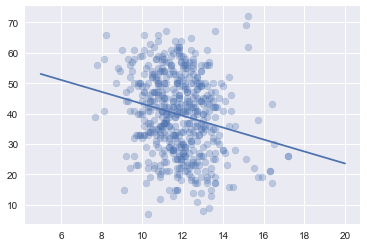

In [313]:
plt.scatter(X_train_by.loc[:,selected_column1],y_train_by,alpha=.3)
vec1 = np.linspace(5,20,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1)

In [315]:
train_set_pred1 = lr_model1.predict(X_train_by.loc[:,selected_column1])

In [314]:
test_set_pred1 = lr_model1.predict(X_test_by.loc[:,selected_column1])

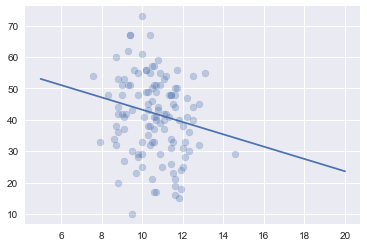

In [317]:
plt.scatter(X_test_by.loc[:,selected_column1],y_test_by,alpha=.3)
vec1 = np.linspace(5,20,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1)

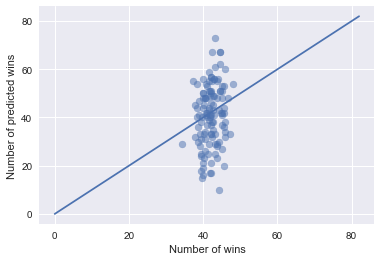

In [319]:
plt.scatter(test_set_pred1,y_test_by,alpha=.5)
plt.plot(np.linspace(0,82,1000),np.linspace(0,82,1000))
plt.xlabel('Number of wins')
plt.ylabel('Number of predicted wins')

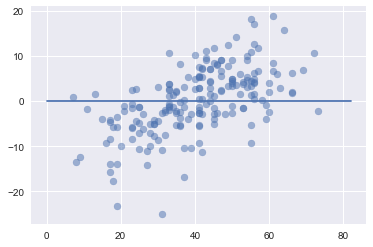

In [61]:
plt.scatter(y_test,y_test-test_set_pred1,alpha=.5)
plt.plot(np.linspace(0,82,1000),np.linspace(0,0,1000))

In [62]:
# Root Mean Square Error
np.sqrt(np.mean((test_set_pred1 - y_test)**2))

7.2394650311613322

In [63]:
# Mean Absolute Deviation
(np.mean(np.abs(test_set_pred1 - y_test)))

5.687051334127681

In [321]:
# R-squared value
lr_model1.score(X_test_by.loc[:,selected_column1],y_test_by)

0.027016210920024264

In [ ]:
np.sqrt(mean_squared_error(y_test, test_set_pred1)), mean_absolute_error(y_test,test_set_pred1)

Mulitple Variable Regression

In [ ]:
selected_columns = ['PPG','RPG','APG','SPG','BPG']
X_train.shape

In [ ]:
y_train.shape

In [ ]:
lr_model_mul = LinearRegression()
lr_model_mul.fit(X_train.loc[:,selected_columns],y_train)

In [ ]:
lr_model2.coef_

In [ ]:
lr_model2.intercept_

In [ ]:
list(zip(selected_columns,lr_model2.coef_))

In [ ]:
test_set_pred2 = lr_model2.predict(X_test.loc[:,selected_columns])

In [ ]:
plt.scatter(test_set_pred2,y_test,alpha=.3)
plt.plot(np.linspace(0,82,1000),np.linspace(0,82,1000))

In [ ]:
plt.scatter(y_test, y_test-test_set_pred2,alpha=.3)
plt.plot(np.linspace(0,82,1000),np.linspace(0,0,1000))

In [ ]:
np.sqrt(np.mean((test_set_pred2 - y_test)**2))

In [ ]:
(np.mean(np.abs(test_set_pred2 - y_test)))

In [ ]:
# All features were fitted to the win column

In [261]:
lr_model3 = LinearRegression(normalize=True)
lr_model3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [262]:
lr_model_by = LinearRegression(normalize=True)
lr_model_by.fit(X_train_by, y_train_by)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [265]:
sorted(list(zip(lr_model3.coef_, X_train.columns)))

[(-253.18467751382238, 'FG%'),
 (-166.1458089879788, 'FG% ALLOW'),
 (-114.78286940799866, 'TS% ALLOW'),
 (-58.534447878087128, 'EFG%'),
 (-39.584536178275471, 'PPS'),
 (-27.986768650886741, 'FT%'),
 (-21.416440017864169, '3FG% ALLOW'),
 (-7.1947032023854787, '3FGM/G'),
 (-3.8295006712203521, 'SPG'),
 (-2.8514493614460661, 'DRPG'),
 (-2.0513444591207635, 'BPG'),
 (-1.8702265645260117, 'PPG ALLOW'),
 (-1.7198719015972963, 'RPG'),
 (-1.2893139096361965, 'FTM/G'),
 (-1.0390734250299951, 'DRPG ALLOW'),
 (-0.65411115236966089, 'FGM/G'),
 (-0.51904452178540472, 'ORPG ALLOW'),
 (-0.21838788654731797, 'APG ALLOW'),
 (-0.2151023498893396, 'PPG'),
 (-0.037301268324463996, 'FGA'),
 (-0.03210887390622575, '3FGA'),
 (-0.026434135553823953, 'TO'),
 (-0.024343935757695324, 'FTA'),
 (-0.0010859401984712603, 'AST'),
 (0.0028796207538980385, 'OFF'),
 (0.022945038583702119, 'FTM'),
 (0.02385072442160353, 'REB'),
 (0.02443959740607762, 'BLK'),
 (0.035357518687988601, 'DEF'),
 (0.044141689003568733, 'FGM'),

In [266]:
sorted(list(zip(lr_model_by.coef_,X_train_by.columns)))

[(-322.50017053588482, 'FG%'),
 (-150.86240863293042, 'TS% ALLOW'),
 (-75.249736949936278, 'FG% ALLOW'),
 (-29.258754465836713, 'PPS'),
 (-25.901891138468365, 'EFG%'),
 (-22.541880391769446, '3FG% ALLOW'),
 (-4.9121149697487025, '3FG%'),
 (-4.5311251987269126, 'SPG'),
 (-4.2844085292963552, '3FGM/G'),
 (-3.8482485165619851, 'ORPG ALLOW'),
 (-3.8120969305667214, 'DRPG'),
 (-3.4386824988218287, 'FTM/G'),
 (-3.3685121639549647, 'DRPG ALLOW'),
 (-1.7478623189538673, 'PPG ALLOW'),
 (-1.3913343995733103, 'ORPG'),
 (-0.92558310493730034, 'FGM/G'),
 (-0.85300345806138744, 'BPG'),
 (-0.62043812562575373, 'RPG'),
 (-0.16604880771905622, 'APG ALLOW'),
 (-0.072402361624097925, 'TO'),
 (-0.042065537576004147, 'FGA'),
 (-0.024578954770280898, '3FGA'),
 (-0.024253754905728859, 'APG'),
 (-0.020906205033446319, 'FTA'),
 (0.0043386143211047853, 'AST'),
 (0.012634183619150944, 'BLK'),
 (0.015485196563864231, 'OFF'),
 (0.02213267726318462, 'REB'),
 (0.03423218448984456, 'DEF'),
 (0.034595654544871603, 'PP

In [267]:
test_set_pred3 = lr_model3.predict(X_test)

In [268]:
test_set_pred_by = lr_model_by.predict(X_test_by)

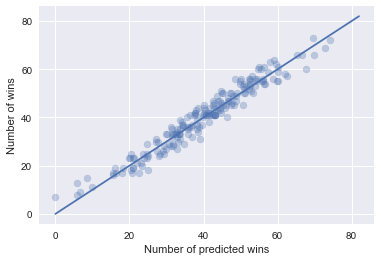

In [269]:
plt.scatter(test_set_pred3,y_test,alpha=.3)
plt.plot(np.linspace(0,82,1000),np.linspace(0,82,1000))
plt.xlabel('Number of predicted wins')
plt.ylabel('Number of wins')

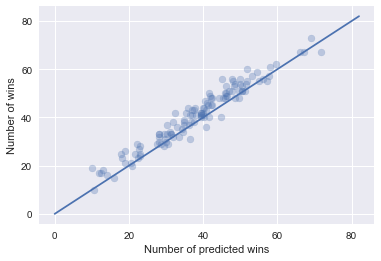

In [270]:
plt.scatter(test_set_pred_by,y_test_by,alpha=0.3)
plt.plot(np.linspace(0,82,1000), np.linspace(0,82,1000))
plt.xlabel('Number of predicted wins')
plt.ylabel('Number of wins')

(-82, 82)

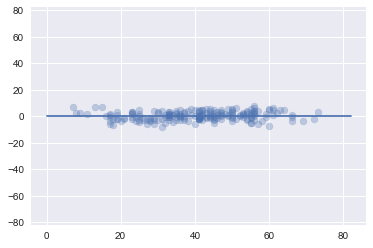

In [271]:
plt.scatter(y_test,y_test-test_set_pred3,alpha=.3)
plt.plot(np.linspace(0,82,1000),np.linspace(0,0,1000))
plt.ylim(-82,82)

(-82, 82)

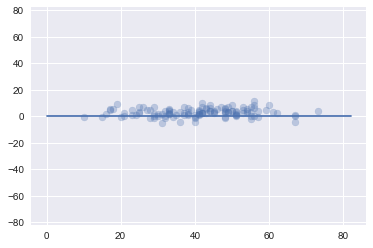

In [272]:
plt.scatter(y_test_by,y_test_by-test_set_pred_by, alpha=0.3)
plt.plot(np.linspace(0,82,1000),np.linspace(0,0,1000))
plt.ylim(-82,82)

In [273]:
np.sqrt(np.mean((test_set_pred3 - y_test)**2))

3.2070897719237976

In [274]:
np.sqrt(np.mean((test_set_pred_by - y_test_by)**2))

4.1584770855924491

In [275]:
(np.mean(np.abs(test_set_pred3 - y_test)))

2.6271824552599083

In [276]:
(np.mean(np.abs(test_set_pred_by - y_test_by)))

3.391706894689866

In [277]:
SSE = np.sum(np.mean((test_set_pred3 - y_test)**2))
SST = np.sum(np.mean((np.mean(y_test) - y_test)**2))
r_squared = 1-SSE/SST
r_squared

0.94597740500384708

In [278]:
r2_score(y_test, test_set_pred3)

0.94597740500384708

In [279]:
r2_score(y_test_by, test_set_pred_by)

0.89251259709066111

In [280]:
lr_model3.score(X_test,y_test)

0.94597740500384697

In [281]:
lr_model_by.score(X_test_by,y_test_by)

0.89251259709066122

----

Regularized Linear Regression

In [151]:
std = StandardScaler()
std.fit(X_train)
std.fit(X_train_by)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [152]:
X_tr = std.transform(X_train)
X_tr_by = std.transform(X_train_by)

In [153]:
X_te = std.transform(X_test)
X_te_by = std.transform(X_test_by)

In [154]:
lr_modelr = Lasso(alpha = 0.001)
lr_modelr.fit(X_tr,y_train)

/Users/ameerbajwa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [155]:
sorted(list(zip(X_train.columns,lr_modelr.coef_)))

[('PPG', 5.1417767859160728),
 ('FGM', 1.9962600150767149),
 ('FGA', -5.7758378881528438),
 ('FGM/G', 1.0657517279229134),
 ('FGA/G', 2.8790715265164284),
 ('FG%', -0.4735184275303887),
 ('3FGM', -0.33593801853973831),
 ('3FGA', -1.9000330662494147),
 ('3FGM/G', -0.49686126396378366),
 ('3FGA/G', 3.2930519697957576),
 ('3FG%', 0.42921300880866609),
 ('FTM', -0.21750058485260101),
 ('FTA', -0.002405491730421698),
 ('FTM/G', 0.82613343470233724),
 ('FTA/G', 0.4583129738220888),
 ('FT%', -0.32754000093239666),
 ('PPS', -0.46398751508616365),
 ('TS%', 5.0097581683449404),
 ('EFG%', -1.3696075250983468),
 ('PPG ALLOW', -9.1195397950666859),
 ('FG% ALLOW', -2.4577871893812495),
 ('3FG% ALLOW', -0.30199496448821345),
 ('EFG% ALLOW', 2.902873509678412),
 ('TS% ALLOW', -2.2486873193436923),
 ('STL', 2.5869170944100919),
 ('SPG', -1.7901610389320861),
 ('BLK', 3.3678503045318746),
 ('BPG', -3.0283282778902691),
 ('TPG ALLOW', 0.42425727343405001),
 ('TPG ALLOW', 1.979167059362132e-14),
 ('OFF', 

In [156]:
test_set_predr = lr_modelr.predict(X_te)

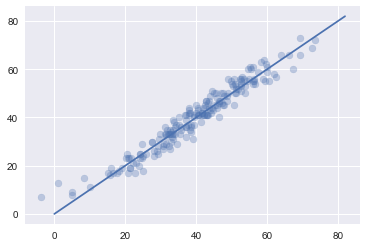

In [157]:
plt.scatter(test_set_predr,y_test,alpha=.3)
plt.plot(np.linspace(0,82,1000),np.linspace(0,82,1000))

(-82, 82)

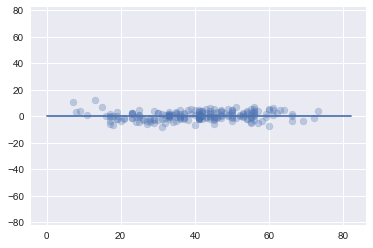

In [158]:
plt.scatter(y_test, y_test-test_set_predr, alpha=0.3)
plt.plot(np.linspace(0,82,1000),np.linspace(0,0,1000))
plt.ylim(-82,82)

In [159]:
# Root mean square error
np.sqrt(np.mean((test_set_predr - y_test)**2))

3.2933308242528212

In [160]:
# R-squared value
lr_modelr.score(X_te,y_test)

0.94303292429548702

In [ ]:
# For the randomized shuffled train and set data

In [161]:
alphavec = 10**np.linspace(-2,4,50)
alphavec

array([  1.00000000e-02,   1.32571137e-02,   1.75751062e-02,
         2.32995181e-02,   3.08884360e-02,   4.09491506e-02,
         5.42867544e-02,   7.19685673e-02,   9.54095476e-02,
         1.26485522e-01,   1.67683294e-01,   2.22299648e-01,
         2.94705170e-01,   3.90693994e-01,   5.17947468e-01,
         6.86648845e-01,   9.10298178e-01,   1.20679264e+00,
         1.59985872e+00,   2.12095089e+00,   2.81176870e+00,
         3.72759372e+00,   4.94171336e+00,   6.55128557e+00,
         8.68511374e+00,   1.15139540e+01,   1.52641797e+01,
         2.02358965e+01,   2.68269580e+01,   3.55648031e+01,
         4.71486636e+01,   6.25055193e+01,   8.28642773e+01,
         1.09854114e+02,   1.45634848e+02,   1.93069773e+02,
         2.55954792e+02,   3.39322177e+02,   4.49843267e+02,
         5.96362332e+02,   7.90604321e+02,   1.04811313e+03,
         1.38949549e+03,   1.84206997e+03,   2.44205309e+03,
         3.23745754e+03,   4.29193426e+03,   5.68986603e+03,
         7.54312006e+03,

In [171]:
lr_modelcv = LassoCV(alphas = alphavec, cv=5)
lr_modelcv.fit(X_tr,y_train)

/Users/ameerbajwa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([  1.00000e-02,   1.32571e-02,   1.75751e-02,   2.32995e-02,
         3.08884e-02,   4.09492e-02,   5.42868e-02,   7.19686e-02,
         9.54095e-02,   1.26486e-01,   1.67683e-01,   2.22300e-01,
         2.94705e-01,   3.90694e-01,   5.17947e-01,   6.86649e-01,
         9.10298e-01,   1...     2.44205e+03,   3.23746e+03,   4.29193e+03,   5.68987e+03,
         7.54312e+03,   1.00000e+04]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [172]:
lr_modelcv.alpha_

0.01

In [173]:
sorted(list(zip(X_train.columns,lr_modelcv.coef_)))

[('PPG', 7.8765716157963199),
 ('FGM', 0.28820107067823214),
 ('FGA', -0.0),
 ('FGM/G', 0.10379631692348039),
 ('FGA/G', 0.10125478044409778),
 ('FG%', 0.0),
 ('3FGM', -0.0),
 ('3FGA', -0.0),
 ('3FGM/G', -0.0),
 ('3FGA/G', 0.51617595552296169),
 ('3FG%', 0.083934279230953743),
 ('FTM', 0.0),
 ('FTA', 0.30994578238273335),
 ('FTM/G', 0.0),
 ('FTA/G', 0.0),
 ('FT%', -0.0),
 ('PPS', 0.0),
 ('TS%', 1.9281997700845761),
 ('EFG%', 0.0),
 ('PPG ALLOW', -9.0274899724073752),
 ('FG% ALLOW', -1.2718367566924222),
 ('3FG% ALLOW', -0.22028358453863503),
 ('EFG% ALLOW', 1.0951382792478501),
 ('TS% ALLOW', -1.3279386785484457),
 ('STL', 0.49380433797568457),
 ('SPG', -0.0),
 ('BLK', 2.3087650085618376),
 ('BPG', -2.0940634997689003),
 ('TPG ALLOW', 0.57709883925130212),
 ('TPG ALLOW', 1.4583552518513383e-14),
 ('OFF', -0.0),
 ('ORPG', 0.75401286685416513),
 ('ORPG ALLOW', 0.088956656704663864),
 ('DEF', 4.0504017277619369),
 ('DRPG', -0.96873805309398131),
 ('DRPG ALLOW', -1.2764397489248245),
 ('RE

In [174]:
test_set_predcv = lr_modelcv.predict(X_te)

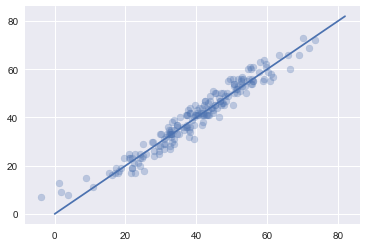

In [175]:
plt.scatter(test_set_predcv,y_test,alpha=.3)
plt.plot(np.linspace(0,82,1000),np.linspace(0,82,1000))

In [176]:
np.sqrt(np.mean((test_set_predcv - y_test)**2))

3.33069091451679

In [177]:
lr_modelcv.score(X_te,y_test)

0.94173310531549603

In [ ]:
# For the test set of 2013-2016 stats vs train set of 1995-2013

In [170]:
lr_modelcv_by = LassoCV(alphas = alphavec, cv=5)
lr_modelcv_by.fit(X_tr_by,y_train_by)

/Users/ameerbajwa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ameerbajwa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([  1.00000e-02,   1.32571e-02,   1.75751e-02,   2.32995e-02,
         3.08884e-02,   4.09492e-02,   5.42868e-02,   7.19686e-02,
         9.54095e-02,   1.26486e-01,   1.67683e-01,   2.22300e-01,
         2.94705e-01,   3.90694e-01,   5.17947e-01,   6.86649e-01,
         9.10298e-01,   1...     2.44205e+03,   3.23746e+03,   4.29193e+03,   5.68987e+03,
         7.54312e+03,   1.00000e+04]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [178]:
lr_modelcv_by.alpha_

0.01

In [179]:
sorted(list(zip(X_train_by.columns,lr_modelcv.coef_)))

[('PPG', 7.8765716157963199),
 ('FGM', 0.28820107067823214),
 ('FGA', -0.0),
 ('FGM/G', 0.10379631692348039),
 ('FGA/G', 0.10125478044409778),
 ('FG%', 0.0),
 ('3FGM', -0.0),
 ('3FGA', -0.0),
 ('3FGM/G', -0.0),
 ('3FGA/G', 0.51617595552296169),
 ('3FG%', 0.083934279230953743),
 ('FTM', 0.0),
 ('FTA', 0.30994578238273335),
 ('FTM/G', 0.0),
 ('FTA/G', 0.0),
 ('FT%', -0.0),
 ('PPS', 0.0),
 ('TS%', 1.9281997700845761),
 ('EFG%', 0.0),
 ('PPG ALLOW', -9.0274899724073752),
 ('FG% ALLOW', -1.2718367566924222),
 ('3FG% ALLOW', -0.22028358453863503),
 ('EFG% ALLOW', 1.0951382792478501),
 ('TS% ALLOW', -1.3279386785484457),
 ('STL', 0.49380433797568457),
 ('SPG', -0.0),
 ('BLK', 2.3087650085618376),
 ('BPG', -2.0940634997689003),
 ('TPG ALLOW', 0.57709883925130212),
 ('TPG ALLOW', 1.4583552518513383e-14),
 ('OFF', -0.0),
 ('ORPG', 0.75401286685416513),
 ('ORPG ALLOW', 0.088956656704663864),
 ('DEF', 4.0504017277619369),
 ('DRPG', -0.96873805309398131),
 ('DRPG ALLOW', -1.2764397489248245),
 ('RE

In [180]:
test_set_predcv_by = lr_modelcv_by.predict(X_te_by)

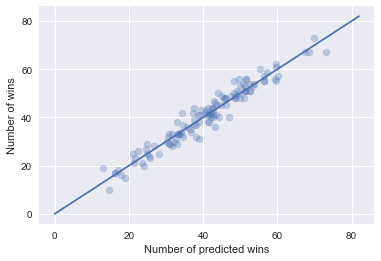

In [184]:
plt.scatter(test_set_predcv_by,y_test_by,alpha=.3)
plt.plot(np.linspace(0,82,1000),np.linspace(0,82,1000))
plt.xlabel('Number of predicted wins')
plt.ylabel('Number of wins')

In [182]:
np.sqrt(np.mean((test_set_predcv_by - y_test_by)**2))

3.0429588923526296

In [183]:
lr_modelcv_by.score(X_te_by,y_test_by)

0.94244525751239239

In [ ]:
# Finding the best lambda value using Lasso

In [ ]:
alphalist = 10**(np.linspace(-3,4,200))
err_vec_test = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    steps = [('standardize', StandardScaler()), ('lasso', Lasso(alpha = curr_alpha))]
#    steps = [('standardize', StandardScaler()), ('ridge', Ridge(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train, y_train)
    test_set_pred7 = pipe.predict(X_test)
    err_vec_test[i] = np.sqrt(np.mean((test_set_pred7 - y_test)**2))

    train_set_pred7 = pipe.predict(X_train)
    err_vec_train[i] = np.sqrt(np.mean((train_set_pred7 - y_train)**2))

In [ ]:
plt.plot(np.log10(alphalist),err_vec_test)
plt.plot(np.log10(alphalist),err_vec_train)

In [ ]:
np.min(err_vec_test)

In [ ]:
alphalist[np.argmin(err_vec_test)]

In [ ]:
# Using LassoCV to find the best alpha value

In [ ]:
lr_model8 = LassoCV(alphas = alphavec, cv=5)
lr_model8.fit(X_tr,y_train)

In [ ]:
lr_model8.alpha_

In [ ]:
list(zip(X_train.columns,lr_model8.coef_))

In [ ]:
test_set_pred8 = lr_model8.predict(X_te)

In [ ]:
np.sqrt(np.mean((test_set_pred8 - y_test)**2))

In [ ]:
lr_model8.score(X_te,y_test)

---

Random Forest

In [ ]:
# Single Decision Tree
from sklearn import tree

In [ ]:
dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=4, min_samples_leaf=8)

In [ ]:
dtrmodel.fit(X_train,y_train)

In [ ]:
dtrmodel.tree_

In [ ]:
tree.export_graphviz(dtrmodel, out_file='stats_tree.dot',feature_names = X_train.columns)

In [ ]:
!head stats_tree.dot

In [ ]:
list(zip(dtrmodel.tree_.feature,dtrmodel.tree_.threshold))[:10]

In [ ]:
list(zip(dtrmodel.tree_.children_left,dtrmodel.tree_.children_right))[:10]

In [ ]:
tree_pred_test = dtrmodel.predict(X_test)
plt.scatter(y_test, tree_pred_test,alpha=.3)
plt.plot(np.linspace(0,82,1000),np.linspace(0,82,1000))

In [ ]:
np.sqrt(np.mean((tree_pred_test - y_test)**2))

In [ ]:
dtrmodel.score(X_test,y_test)

In [ ]:
# Random Forest

In [185]:
from sklearn.ensemble import RandomForestRegressor

In [252]:
rfmodel_by = RandomForestRegressor(n_estimators = 500, min_samples_leaf=4, max_features=40, n_jobs=-1)
rfmodel_by.fit(X_train_by,y_train_by)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=40, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [253]:
rf_test_pred_by = rfmodel_by.predict(X_test_by)

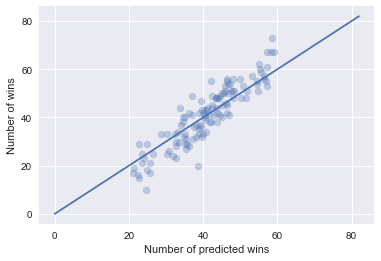

In [258]:
plt.scatter(rf_test_pred_by,y_test_by,alpha=.3)
plt.plot(np.linspace(0,82,1000),np.linspace(0,82,1000))
plt.xlabel('Number of predicted wins')
plt.ylabel('Number of wins')

In [259]:
np.sqrt(np.mean((rf_test_pred_by - y_test_by)**2))

5.6323020450258419

In [260]:
rfmodel_by.score(X_test_by,y_test_by)

0.8028209282519283

In [206]:
models = {}
models['randomForest'] = RandomForestRegressor()

In [207]:
coefs = models['randomForest'].fit(all_stats_X,y).feature_importances_
sorted(zip(all_stats_X.columns,coefs), key = lambda x:x[1], reverse=True)

[('FG% ALLOW', 0.21995914621343066),
 ('TS%', 0.21551504289609805),
 ('FG%', 0.15322187379395943),
 ('TS% ALLOW', 0.10536443241685937),
 ('EFG% ALLOW', 0.025048255378908656),
 ('STL', 0.021035410734749925),
 ('EFG%', 0.017333191749392539),
 ('DEF', 0.017074092630239648),
 ('OFF', 0.016845888201675787),
 ('3FG% ALLOW', 0.015336355318403497),
 ('PPG ALLOW', 0.014934902814882883),
 ('TPG', 0.013169887817224956),
 ('REB', 0.012859537593576095),
 ('TO', 0.011454192749959593),
 ('PPG', 0.010679414783864312),
 ('APG ALLOW', 0.010465420055177772),
 ('FTA', 0.0094711853384946525),
 ('PPS', 0.009128691824717693),
 ('FGA', 0.0077612975324752673),
 ('RGP ALLOW', 0.0069677800415534176),
 ('FTM', 0.0063615107434755111),
 ('AST', 0.006193900315894999),
 ('TPG ALLOW', 0.0058850201024536327),
 ('FT%', 0.0054887310887151907),
 ('3FG%', 0.0053320422861386409),
 ('BLK', 0.0053189073059956736),
 ('RPG', 0.0053166890630747445),
 ('DRPG ALLOW', 0.0048084366155313335),
 ('APG', 0.0038490702530486537),
 ('ORPG

In [217]:
X_train_by_best = X_train_by.loc[:,['FG% ALLOW', 'TS%', 'FG%', 'TS% ALLOW', 'EFG% ALLOW', 'STL', 'EFG%', 'DEF', 'OFF','3FG% ALLOW']]
X_test_by_best = X_test_by.loc[:,['FG% ALLOW', 'TS%', 'FG%', 'TS% ALLOW', 'EFG% ALLOW', 'STL', 'EFG%', 'DEF', 'OFF','3FG% ALLOW']]

In [218]:
rfmodel_by_best = RandomForestRegressor(n_estimators = 500, min_samples_leaf=4, max_features=8, n_jobs=-1)
rfmodel_by_best.fit(X_train_by_best,y_train_by)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [220]:
rf_test_pred_by_best = rfmodel_by_best.predict(X_test_by_best)

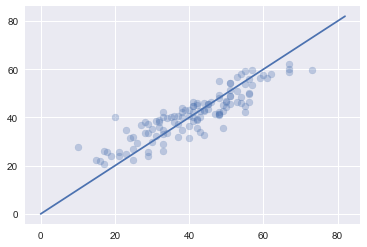

In [221]:
plt.scatter(y_test_by, rf_test_pred_by_best,alpha=.3)
plt.plot(np.linspace(0,82,1000),np.linspace(0,82,1000))

In [222]:
np.sqrt(np.mean((rf_test_pred_by_best - y_test_by)**2))

5.9952379477739424

In [223]:
rfmodel_by_best.score(X_test_by_best,y_test_by)

0.77659041924523742

In [283]:
X_train_by = final_stat_table.loc[final_stat_table.SEASON < 2013].loc[:,['PPG', 'FGM', 'FGA', 'FGM/G', 'FGA/G', 'FG%', '3FGM', '3FGA', '3FGM/G', '3FGA/G',
                                     '3FG%', 'FTM', 'FTA', 'FTM/G', 'FTA/G', 'FT%', 'PPS', 'TS%', 'EFG%', 'PPG ALLOW',
                                     'FG% ALLOW', '3FG% ALLOW', 'EFG% ALLOW', 'TS% ALLOW', 'STL', 'SPG', 'BLK', 'BPG',
                                     'TPG ALLOW', 'OFF', 'ORPG', 'ORPG ALLOW', 'DEF', 'DRPG', 'DRPG ALLOW', 'REB', 'RPG',
                                     'RGP ALLOW', 'AST', 'APG', 'APG ALLOW', 'TO', 'TPG']]

X_test_by = final_stat_table.loc[final_stat_table.SEASON >= 2013].loc[:,['PPG', 'FGM', 'FGA', 'FGM/G', 'FGA/G', 'FG%', '3FGM', '3FGA', '3FGM/G', '3FGA/G',
                                     '3FG%', 'FTM', 'FTA', 'FTM/G', 'FTA/G', 'FT%', 'PPS', 'TS%', 'EFG%', 'PPG ALLOW',
                                     'FG% ALLOW', '3FG% ALLOW', 'EFG% ALLOW', 'TS% ALLOW', 'STL', 'SPG', 'BLK', 'BPG',
                                     'TPG ALLOW', 'OFF', 'ORPG', 'ORPG ALLOW', 'DEF', 'DRPG', 'DRPG ALLOW', 'REB', 'RPG',
                                     'RGP ALLOW', 'AST', 'APG', 'APG ALLOW', 'TO', 'TPG']]

In [286]:
X_train_by_wosht = X_train_by.loc[:,['PPG ALLOW',
                                     'FG% ALLOW', '3FG% ALLOW', 'EFG% ALLOW', 'TS% ALLOW', 'STL', 'SPG', 'BLK', 'BPG',
                                     'TPG ALLOW', 'OFF', 'ORPG', 'ORPG ALLOW', 'DEF', 'DRPG', 'DRPG ALLOW', 'REB', 'RPG',
                                     'RGP ALLOW', 'AST', 'APG', 'APG ALLOW', 'TO', 'TPG']]
X_test_by_wosht = X_test_by.loc[:,['PPG ALLOW',
                                     'FG% ALLOW', '3FG% ALLOW', 'EFG% ALLOW', 'TS% ALLOW', 'STL', 'SPG', 'BLK', 'BPG',
                                     'TPG ALLOW', 'OFF', 'ORPG', 'ORPG ALLOW', 'DEF', 'DRPG', 'DRPG ALLOW', 'REB', 'RPG',
                                     'RGP ALLOW', 'AST', 'APG', 'APG ALLOW', 'TO', 'TPG']]

In [288]:
X_train_by_woreb = X_train_by.loc[:,['PPG', 'FGM', 'FGA', 'FGM/G', 'FGA/G', 'FG%', '3FGM', '3FGA', '3FGM/G', '3FGA/G',
                                     '3FG%', 'FTM', 'FTA', 'FTM/G', 'FTA/G', 'FT%', 'PPS', 'TS%', 'EFG%', 'PPG ALLOW',
                                     'FG% ALLOW', '3FG% ALLOW', 'EFG% ALLOW', 'TS% ALLOW', 'STL', 'SPG', 'BLK', 'BPG',
                                     'TPG ALLOW','AST', 'APG', 'APG ALLOW', 'TO', 'TPG']]
X_test_by_woreb = X_test_by.loc[:,['PPG', 'FGM', 'FGA', 'FGM/G', 'FGA/G', 'FG%', '3FGM', '3FGA', '3FGM/G', '3FGA/G',
                                     '3FG%', 'FTM', 'FTA', 'FTM/G', 'FTA/G', 'FT%', 'PPS', 'TS%', 'EFG%', 'PPG ALLOW',
                                     'FG% ALLOW', '3FG% ALLOW', 'EFG% ALLOW', 'TS% ALLOW', 'STL', 'SPG', 'BLK', 'BPG',
                                     'TPG ALLOW', 'AST', 'APG', 'APG ALLOW', 'TO', 'TPG']]

In [293]:
X_train_by_woas = X_train_by.loc[:,['PPG', 'FGM', 'FGA', 'FGM/G', 'FGA/G', 'FG%', '3FGM', '3FGA', '3FGM/G', '3FGA/G',
                                     '3FG%', 'FTM', 'FTA', 'FTM/G', 'FTA/G', 'FT%', 'PPS', 'TS%', 'EFG%', 'PPG ALLOW',
                                     'FG% ALLOW', '3FG% ALLOW', 'EFG% ALLOW', 'TS% ALLOW', 'STL', 'SPG', 'BLK', 'BPG',
                                     'TPG ALLOW', 'OFF', 'ORPG', 'ORPG ALLOW', 'DEF', 'DRPG', 'DRPG ALLOW', 'REB', 'RPG',
                                     'RGP ALLOW']]
X_test_by_woas = X_test_by.loc[:,['PPG', 'FGM', 'FGA', 'FGM/G', 'FGA/G', 'FG%', '3FGM', '3FGA', '3FGM/G', '3FGA/G',
                                     '3FG%', 'FTM', 'FTA', 'FTM/G', 'FTA/G', 'FT%', 'PPS', 'TS%', 'EFG%', 'PPG ALLOW',
                                     'FG% ALLOW', '3FG% ALLOW', 'EFG% ALLOW', 'TS% ALLOW', 'STL', 'SPG', 'BLK', 'BPG',
                                     'TPG ALLOW', 'OFF', 'ORPG', 'ORPG ALLOW', 'DEF', 'DRPG', 'DRPG ALLOW', 'REB', 'RPG',
                                     'RGP ALLOW']]

In [296]:
X_train_by_wodef = X_train_by.loc[:,['PPG', 'FGM', 'FGA', 'FGM/G', 'FGA/G', 'FG%', '3FGM', '3FGA', '3FGM/G', '3FGA/G',
                                     '3FG%', 'FTM', 'FTA', 'FTM/G', 'FTA/G', 'FT%', 'PPS', 'TS%', 'EFG%','OFF', 'ORPG', 'ORPG ALLOW', 'DEF', 'DRPG', 'DRPG ALLOW', 'REB', 'RPG',
                                     'RGP ALLOW', 'AST', 'APG', 'APG ALLOW', 'TO', 'TPG']]

X_test_by_wodef = X_test_by.loc[:,['PPG', 'FGM', 'FGA', 'FGM/G', 'FGA/G', 'FG%', '3FGM', '3FGA', '3FGM/G', '3FGA/G',
                                     '3FG%', 'FTM', 'FTA', 'FTM/G', 'FTA/G', 'FT%', 'PPS', 'TS%', 'EFG%','OFF', 'ORPG', 'ORPG ALLOW', 'DEF', 'DRPG', 'DRPG ALLOW', 'REB', 'RPG',
                                     'RGP ALLOW', 'AST', 'APG', 'APG ALLOW', 'TO', 'TPG']]

In [300]:
X_train_by_worebas = X_train_by.loc[:,['PPG', 'FGM', 'FGA', 'FGM/G', 'FGA/G', 'FG%', '3FGM', '3FGA', '3FGM/G', '3FGA/G',
                                     '3FG%', 'FTM', 'FTA', 'FTM/G', 'FTA/G', 'FT%', 'PPS', 'TS%', 'EFG%', 'PPG ALLOW',
                                     'FG% ALLOW', '3FG% ALLOW', 'EFG% ALLOW', 'TS% ALLOW', 'STL', 'SPG', 'BLK', 'BPG',
                                     'TPG ALLOW']]

In [305]:
models = {}
parameters = {}

models['linear_model'] = LinearRegression()
models['ridge_model'] = Ridge()
models['lasso_model'] = Lasso(alpha=0.01)
#models['robust_regression'] = linear_model.SGDRegressor(loss='huber',n_iter=20)
#models['eps_insensitive'] = linear_model.SGDRegressor(loss='epsilon_insensitive',n_iter=20)


models['cart'] = tree.DecisionTreeRegressor(max_depth=4)
models['extratrees'] = tree.ExtraTreeRegressor(max_depth=4)
models['randomForest'] = RandomForestRegressor(n_estimators = 500, min_samples_leaf=4, max_features=8, n_jobs=-1)
#models['adaboostedTrees'] = ensemble.AdaBoostRegressor()
models['gradboostedTrees'] = ensemble.GradientBoostingRegressor(loss='huber', n_estimators = 500, min_samples_leaf=4, max_features=25)


for name,model in models.items():
    scores = model_selection.cross_val_score(model, X_train_by_wosht, y_train_by, n_jobs=1)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print()

Model: linear_model
Score: 0.86889589913

Model: ridge_model
Score: 0.852848678746

Model: lasso_model
Score: 0.853098599782

Model: cart
Score: 0.361242559659

Model: extratrees
Score: 0.355614901194



/Users/ameerbajwa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ameerbajwa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ameerbajwa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Model: randomForest
Score: 0.652614236126

Model: gradboostedTrees
Score: 0.713001228939

